In [175]:
from keras.datasets import reuters
from keras.utils import to_categorical
from keras import models,layers,optimizers
import numpy as np

In [176]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [177]:
len(train_data)
np.array(train_labels)

array([ 3,  4,  3, ..., 25,  3, 25])

In [178]:
len(test_data)

2246

In [179]:
word_index = reuters.get_word_index()

In [180]:
reverse_word_index = dict([(values,keys) for keys,values in word_index.items()])

In [181]:
decoded_newswire = ' '.join(reverse_word_index.get(i-3,"?") for i in train_data[0])

In [182]:
decoded_newswire

u'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Preparing our Dataset

In [183]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for index,sequence in enumerate(sequences):
        results[index,sequence] = 1
    return results
        

In [184]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
??training_arrays.test_loop()

Object `training_arrays.test_loop` not found.


## Building our Network Architecture

Since this datasets contains 46 classes, the dimensionality of the output space is much higher.
For the IMDB Dataset, which contained only 2 classes, it was okay to use 16 hidden units in each intermediate layer.
But since this dataset, has a large number of classes, inorder to prevent each layer dropping relevant information and hence proving to be an information bottleneck, I will be using 64 hidden units for each layer.

In [185]:
model = models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

## Preparing our Validation Set

In [186]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

# For categorical_crossentropy
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# For sparse_categorical_crosstentropy
# y_val = train_labels[:1000]
# partial_y_train = train_labels[1000:]

## Training our Model

In [187]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                     validation_data=(x_val,y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 228us/step - loss: 2.6198 - acc: 0.4909 - val_loss: 1.6890 - val_acc: 0.6080
Epoch 2/10
7982/7982 [==============================] - 1s 116us/step - loss: 1.4455 - acc: 0.6824 - val_loss: 1.3129 - val_acc: 0.6860
Epoch 3/10
7982/7982 [==============================] - 1s 96us/step - loss: 1.0887 - acc: 0.7620 - val_loss: 1.1314 - val_acc: 0.7420
Epoch 4/10
7982/7982 [==============================] - 1s 108us/step - loss: 0.8698 - acc: 0.8054 - val_loss: 1.0485 - val_acc: 0.7700
Epoch 5/10
7982/7982 [==============================] - 1s 103us/step - loss: 0.6932 - acc: 0.8470 - val_loss: 0.9884 - val_acc: 0.7880
Epoch 6/10
7982/7982 [==============================] - 1s 98us/step - loss: 0.5591 - acc: 0.8747 - val_loss: 0.9613 - val_acc: 0.7920
Epoch 7/10
7982/7982 [==============================] - 1s 98us/step - loss: 0.4532 - acc: 0.8996 - val_loss: 0.9430 - val_acc: 0.8030
Epo

## Visualizing the Training and Validation Loss

In [188]:
import matplotlib.pyplot as plt


In [189]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [190]:
training_loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']

In [191]:
epochs = range(1, len(training_loss_values) + 1)

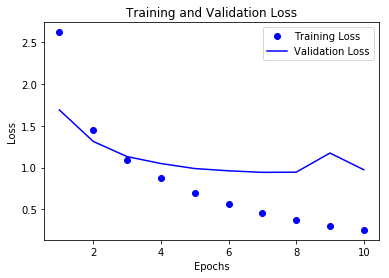

In [192]:
plt.plot(epochs, training_loss_values, 'bo',label= "Training Loss")
plt.plot(epochs, validation_loss_values, 'b',label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Visualizing Training and Validation Accuracies

In [193]:
training_acc_values = history_dict['acc']
validation_acc_values = history_dict['val_acc']

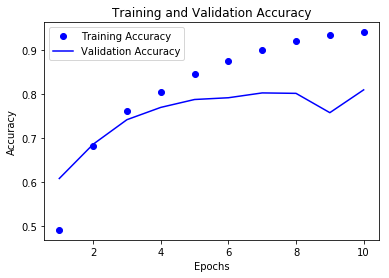

In [194]:
plt.plot(epochs, training_acc_values, 'bo',label= "Training Accuracy")
plt.plot(epochs, validation_acc_values, 'b',label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Evaluating our Model

In [196]:
results = model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 103us/step


In [197]:
results

[1.0884342380431966, 0.7756010685663401]

## Using our Model to predict new data

In [198]:
predictions = model.predict(x_test)